In [40]:
!pip install fuzzy-c-means
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
from tabulate import tabulate
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, SpectralClustering
from sklearn.model_selection import train_test_split
from sklearn.metrics import silhouette_score
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
from fcmeans import FCM

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [41]:
# Leitura dos dados
def leituraDados():
  url = "https://raw.githubusercontent.com/RafaelBortolozo/Pattern_recognition/main/unsupervised_classification/Raisin_Dataset.csv"
  dataset = pd.read_csv(url, sep=",")

  X = dataset.columns[0:7]
  X = dataset[X]

  y = dataset["Class"]

  # display(X)
  # display(pd.DataFrame(y, columns = ['Class']))

  return X, y

In [42]:
# Normalização (desvio padrão, min-max)
def normalizacao(data, method="minmax"):
  new_data = []

  if method == "std":
    data_T = X.T
    for i in data_T:
      new_data.append((i - np.mean(row)) / ((np.std(i, ddof=1))**2))
    new_data = np.array(new_data).T

  if method == "minmax":
    new_data = (data - data.min(axis=0)) / (data.max(axis=0) - data.min(axis=0))

  return new_data

In [43]:
# "Kecimen" = 0
# "Besni"   = 1
def mapeamentoClasses(df):
  data = []
  for i in df:
    if i == "Kecimen":
      data.append(0)
    elif i == "Besni":
      data.append(1)
  return data

In [44]:
def dividirDataset(data,labels,test_size=0.33,shuffle=True):
   X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=test_size, random_state=random.randint(10,48),shuffle=shuffle) 
   return X_train, X_test, y_train, y_test

In [45]:
def printClustering(X, y_pred, centers):
  plt.figure()

  plt.scatter(centers[:, 0], centers[:, 1], c="green", marker='*', s=200)
  plt.scatter(X[:, 0], X[:, 1], c=y_pred)

  plt.show()

In [46]:
def print_results(modelName, pca, model, X_test, y_test, y_pred):

  variance = round(sum(pca.explained_variance_ratio_), 2)
  n_components = pca.n_components_
  explained_variance_ratio = [round(item, 2) for item in pca.explained_variance_ratio_]

  if modelName == 'K-Means':
    centers = model.cluster_centers_
  else:
    centers = model.centers

  silhouette_avg = silhouette_score(X_test, y_pred)
  m1 = X_test[y_pred==0].mean()
  m2 = X_test[y_pred==1].mean()
  s1 = X_test[y_pred==0].std(ddof=1)
  s2 = X_test[y_pred==1].std(ddof=1)
  fisher =  (abs(m1 - m2) ** 2) / ((s1 ** 2) + (s2 ** 2))

  mc = confusion_matrix(y_test, y_pred)
  tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
  acc = (tn + tp) / (tn + fp + fn +tp)
  tpr = tp / (tp + fn)
  tnr = tn / (tn + fp)

  print('==================================================')
  print(f'Modelo: {modelName}')
  print(f'Número de componentes: {n_components}')
  print(f'Variância acumulada: {variance} -> {explained_variance_ratio}')

  print("\nINTERNO")
  print(f"Silhouette: {round(silhouette_avg,2)}")
  print(f"Fisher: {round(fisher, 2)}")

  print("\nEXTERNO")
  print(f'Acurácia: {round(acc,2)}')
  print(f'TPR: {round(tpr,2)}')
  print(f'TNR: {round(tnr,2)}')

  print(f'\nMatriz de confusão:')
  print(f"{mc[0]}\n{mc[1]}\n")

  if n_components > 1:
    printClustering(X_test, y_pred, centers)

In [47]:
def treinar_modelo(X, y, pca, model, modelName):
  novo_dataset = pca.fit_transform(np.copy(X), y)
  
  X_train, X_test, y_train, y_test = train_test_split(novo_dataset, y, test_size=0.33, random_state=16)
  
  model.fit(X_train)
  
  pred = model.predict(X_test)
  
  y_pred = pred.reshape(-1)

  print_results(modelName, pca, model, X_test, y_test, y_pred)

Modelo: K-Means
Número de componentes: 1
Variância acumulada: 0.75 -> [0.75]

INTERNO
Silhouette: 0.62
Fisher: 4.43

EXTERNO
Acurácia: 0.76
TPR: 0.56
TNR: 0.99

Matriz de confusão:
[139   1]
[69 88]

Modelo: Fuzzy C-Means
Número de componentes: 1
Variância acumulada: 0.75 -> [0.75]

INTERNO
Silhouette: 0.62
Fisher: 4.43

EXTERNO
Acurácia: 0.24
TPR: 0.44
TNR: 0.01

Matriz de confusão:
[  1 139]
[88 69]

Modelo: K-Means
Número de componentes: 2
Variância acumulada: 0.92 -> [0.75, 0.17]

INTERNO
Silhouette: 0.5
Fisher: 0.83

EXTERNO
Acurácia: 0.76
TPR: 0.56
TNR: 0.99

Matriz de confusão:
[139   1]
[69 88]



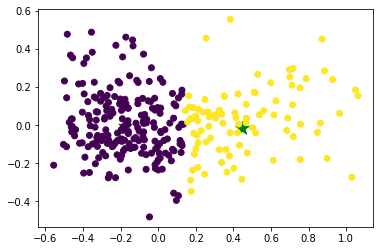

Modelo: Fuzzy C-Means
Número de componentes: 2
Variância acumulada: 0.92 -> [0.75, 0.17]

INTERNO
Silhouette: 0.49
Fisher: 0.8

EXTERNO
Acurácia: 0.79
TPR: 0.61
TNR: 0.99

Matriz de confusão:
[138   2]
[61 96]



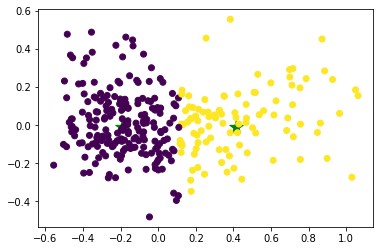

Modelo: K-Means
Número de componentes: 3
Variância acumulada: 0.99 -> [0.75, 0.17, 0.06]

INTERNO
Silhouette: 0.47
Fisher: 0.43

EXTERNO
Acurácia: 0.76
TPR: 0.56
TNR: 0.99

Matriz de confusão:
[139   1]
[69 88]



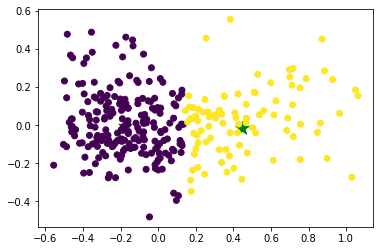

Modelo: Fuzzy C-Means
Número de componentes: 3
Variância acumulada: 0.99 -> [0.75, 0.17, 0.06]

INTERNO
Silhouette: 0.46
Fisher: 0.41

EXTERNO
Acurácia: 0.2
TPR: 0.37
TNR: 0.01

Matriz de confusão:
[  2 138]
[99 58]



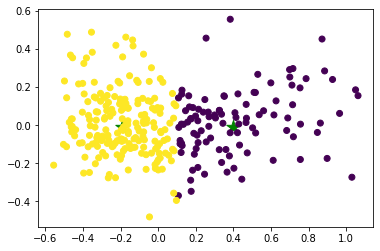

In [48]:
X, y = leituraDados()
X = normalizacao(X, "minmax")
y = mapeamentoClasses(y)

for num_cps in [1, 2, 3]:
  pca = PCA(n_components = num_cps, svd_solver='auto')

  treinar_modelo(X, y, pca, KMeans(n_clusters=2, random_state=20), 'K-Means');
  treinar_modelo(X, y, pca, FCM(n_clusters=2), 'Fuzzy C-Means');